Установка необходимых библиотек (если не установлены)

In [1]:
!pip install -U scikit-learn
!pip install pandas
!pip install matplotlib

print("\nУстановка успешна")

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/d0/0b/26ad95cf0b747be967b15fb71a06f5ac67aba0fd2f9cd174de6edefc4674/scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 664.7 kB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not w

Считывание файла

In [1]:
import pandas
import os

file_path = "russian_demography.csv"
ram_capacity = 2**20

if file_path.endswith('.csv') and os.path.isfile(file_path) and os.path.getsize(file_path) <= ram_capacity:
    demography_data = pandas.read_csv(file_path)
    print(demography_data)
else:
    print("НЕТ ТАКОГО ФАЙЛА")

      year                          region  npg  birth_rate  death_rate  \
0     1990              Republic of Adygea  1.9        14.2        12.3   
1     1990                      Altai Krai  1.8        12.9        11.1   
2     1990                     Amur Oblast  7.6        16.2         8.6   
3     1990              Arkhangelsk Oblast  3.7        13.5         9.8   
4     1990                Astrakhan Oblast  4.7        15.1        10.4   
...    ...                             ...  ...         ...         ...   
2375  2017                Chuvash Republic -1.3        11.3        12.6   
2376  2017       Chukotka Autonomous Okrug  3.7        13.1         9.4   
2377  2017        Sakha (Yakutia) Republic  6.4        14.5         8.1   
2378  2017  Yamalo-Nenets Autonomous Okrug  9.1        14.0         4.9   
2379  2017                Yaroslavl Oblast -4.7        10.5        15.2   

        gdw  urbanization  
0     84.66         52.42  
1     80.24         58.07  
2     69.55    

Рассчет данных по региону

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

headers = demography_data.columns.tolist()
regions = set(demography_data.region.tolist())

# chosen_column = input(f"Введите колонку, по которой будут производиться расчеты: {headers}\n")
# chosen_country = input(f"Введите код региона, по которому будут производиться расчеты: {regions}\n")
# prediction_year = int(input("Введите год для предсказания: \n"))

chosen_column = 'npg'
chosen_country = 'Altai Krai'
prediction_year = 2023

if chosen_column not in headers or chosen_column == 'region' or chosen_column == 'year':
    print("Колонка выбрана неправильно, попробуйте еще раз")
elif chosen_country not in regions:
    print("Регион выбран неправильно, попробуйте еще раз")
else:
    filtered_data = demography_data[demography_data['region'] == chosen_country]
    print(f"\nДанные, по которым будет производиться расчет: \n{filtered_data}")
    
    X_train, X_test, y_train, y_test = train_test_split(filtered_data[['year']], filtered_data[chosen_column], test_size=0.9, random_state=0)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    x_pred = lr.predict(X_test)
    pred_value = lr.predict(pandas.DataFrame({'year': [prediction_year]}))


Данные, по которым будет производиться расчет: 
      year      region  npg  birth_rate  death_rate    gdw  urbanization
1     1990  Altai Krai  1.8        12.9        11.1  80.24         58.07
86    1991  Altai Krai  0.4        11.7        11.3  79.95         58.08
171   1992  Altai Krai -1.4        10.4        11.8  79.55         55.21
256   1993  Altai Krai -4.9         9.1        14.0  79.16         52.26
341   1994  Altai Krai -5.9         9.2        15.1  78.21         52.06
426   1995  Altai Krai -6.0         8.7        14.7  77.15         51.97
511   1996  Altai Krai -5.9         8.4        14.3  76.16         52.45
596   1997  Altai Krai -5.4         8.4        13.8  74.68         52.55
681   1998  Altai Krai -4.0         8.8        12.8  72.67         52.76
766   1999  Altai Krai -5.1         8.7        13.8  70.13         52.89
851   2000  Altai Krai -5.0         9.3        14.3  67.35         52.77
936   2001  Altai Krai -5.1         9.6        14.7  64.85         52.80
10

Вывод графика 

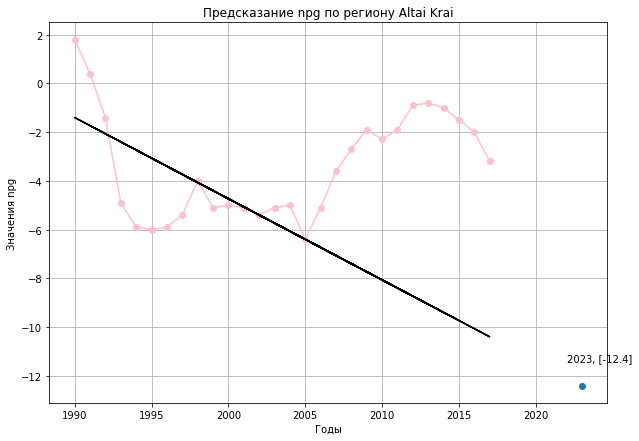

In [20]:
import matplotlib.pyplot as plt



sorted_filtered_data = filtered_data.sort_values('year')

plt.figure(figsize = (10, 7))

plt.plot(sorted_filtered_data.year, sorted_filtered_data[chosen_column], "-o", color = 'pink')
plt.plot(X_test, x_pred, "-", color = 'black')
plt.scatter(prediction_year, pred_value)
plt.annotate(f"{prediction_year}, {pred_value}", xy=(prediction_year, pred_value), xytext=(prediction_year - 1, pred_value + 1))

plt.title(f'Предсказание {chosen_column} по региону {chosen_country}')
plt.xlabel("Годы")
plt.ylabel(f"Значения {chosen_column}")
plt.grid(True)